In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [2]:
def exploratory(data):
    print(f"Ce dataset contient {data.shape[0]} lignes etudiées sur {data.shape[1]} colonnes")
    #Recherche de doublons sur les lignes du dataset
    doublonL=data[data.duplicated(keep=False)]
    print(f"Il y a {doublonL.shape[0]} doublons dans les lignes")
    #Recherche de doublons sur les colonnes du dataset
    doublonC=data[data.duplicated(keep=False)].T
    print(f"Il y a {doublonC.shape[1]} doublons dans les colonnes")
    #Vérifie s'il y a des nan et les additionne pour chaque colonne
    perNan=data.isna().sum().sort_values(ascending=False)*100/len(data)
    print(f"Affichage du pourcentage de nan dans chaque colonnes: {perNan} %")
    #Observation du taux de remplissage de notre dataset
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title("Taux de remplissage du dataset")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()
    #compte les valeurs uniques de la série
    valeursUniques=data.nunique()
    print(f"Le nombre d'occurence des valeurs uniques:{valeursUniques}")
    ColumnData=data.columns
    print(f"La liste des colonnes est : {ColumnData}")
    
    
def nettoyagebyindex(data, a,DelList):
#Localisation par son index puis suppression des lignes
    for i in DelList:
        indexi = data[ data[a] == i].index
        data.drop(indexi , inplace=True)
    print(f'Il reste {data.shape[0]} lignes après nettoyage')
    return data
        


    

In [3]:
dataset1= pd.read_csv('2015-building-energy-benchmarking.csv')

### Observation des datasets

Ce dataset contient 3340 lignes etudiées sur 47 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Comment                                                          99.610778
Outlier                                                          97.485030
YearsENERGYSTARCertified                                         96.706587
City Council Districts                                           93.622754
2010 Census Tracts                                               93.293413
ThirdLargestPropertyUseTypeGFA                                   83.233533
ThirdLargestPropertyUseType                                      83.233533
SecondLargestPropertyUseTypeGFA                                  53.323353
SecondLargestPropertyUseType                                     53.323353
ENERGYSTARScore                                                  23.353293
LargestPropertyUseTypeGFA                                         4.0

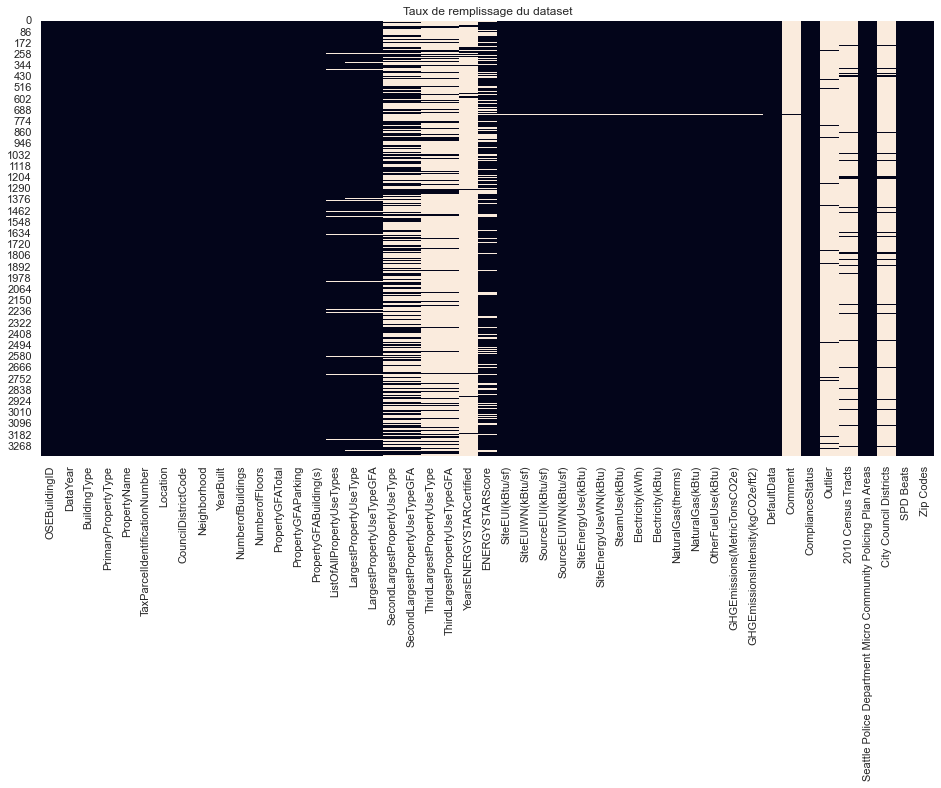

Le nombre d'occurence des valeurs uniques:OSEBuildingID                                                    3340
DataYear                                                            1
BuildingType                                                        7
PrimaryPropertyType                                                27
PropertyName                                                     3287
TaxParcelIdentificationNumber                                    3245
Location                                                         3298
CouncilDistrictCode                                                 7
Neighborhood                                                       13
YearBuilt                                                         113
NumberofBuildings                                                  10
NumberofFloors                                                     50
PropertyGFATotal                                                 3150
PropertyGFAParking                              

In [4]:
exploratory(dataset1)

In [5]:
dataset2 = pd.read_csv('2016-building-energy-benchmarking.csv')

Ce dataset contient 3376 lignes etudiées sur 46 colonnes
Il y a 0 doublons dans les lignes
Il y a 0 doublons dans les colonnes
Affichage du pourcentage de nan dans chaque colonnes: Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
ListOfAllPropertyUseTypes            0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kWh)                     0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     

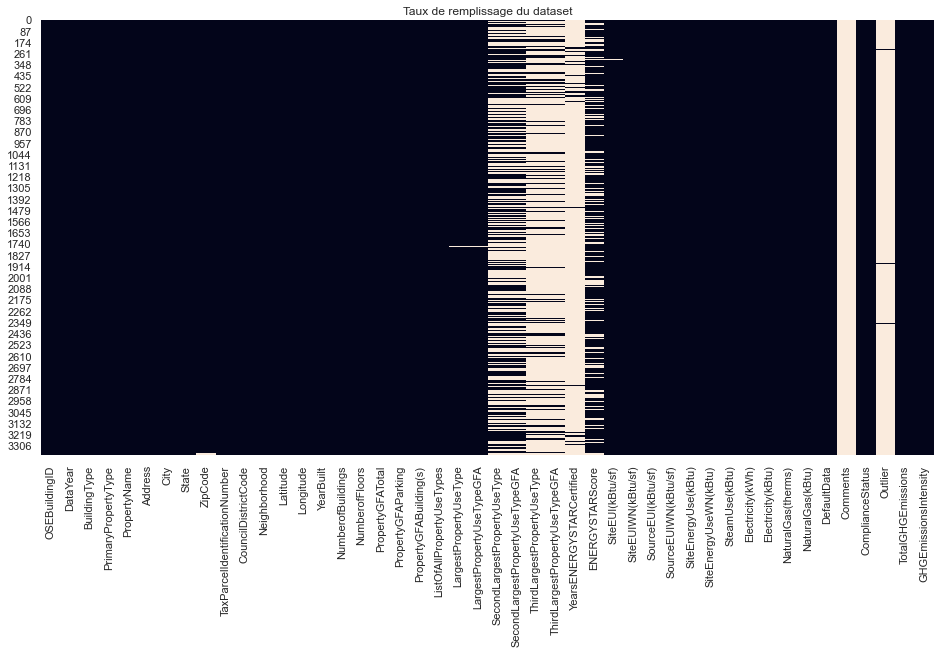

Le nombre d'occurence des valeurs uniques:OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         5

In [6]:
exploratory(dataset2)

In [7]:
import json

with open('socrata_metadata_2015-building-energy-benchmarking.json') as json_file:
    datajson1 = json.load(json_file)
    print(datajson1)

{'id': 'h7rm-fz6m', 'name': '2015 Building Energy Benchmarking', 'assetType': 'dataset', 'attribution': 'City of Seattle', 'attributionLink': 'http://www.seattle.gov/environment', 'averageRating': 0, 'createdAt': 1492461362, 'description': "Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\r\nPer Ordinance (125000), starting with 2015 energy use performance repor

In [8]:
import json

with open('socrata_metadata_2016-building-energy-benchmarking.json') as json_file:
    datajson2 = json.load(json_file)
    print(datajson2)

{'id': '2bpz-gwpy', 'name': '2016 Building Energy Benchmarking', 'assetType': 'dataset', 'attribution': 'City of Seattle', 'attributionLink': 'https://www.seattle.gov/energybenchmarking', 'averageRating': 0, 'createdAt': 1521070051, 'description': "Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle. Buildings account for 33% of Seattle's core emissions. The benchmarking policy supports Seattle's goals to reduce energy use and greenhouse gas emissions from existing buildings. In 2013, the City of Seattle adopted a Climate Action Plan to achieve zero net greenhouse gas (GHG) emissions by 2050. Annual benchmarking, reporting and disclosing of building performance are foundational elements of creating more market value for energy efficiency.\nPer Ordinance (125000), starting with 2015 energy use performance

GHGEmissionsIntensity ET GHGEmissionsIntensity(kgCO2e/ft2) reprséntent la même colonne
ZipCode et Zip Codes ----------------------------------------------------------------
Comments et Comment -----------------------------------------------------------------$


### Regroupons les deux datasets

#### Tout d'abord comparons les et regardons leurs différences 

In [9]:
list1 = dataset1.columns
list2 = dataset2.columns


In [10]:
# list3 contient les noms des Colonnes présentes dans le dataset 1 et pas dans le dataset 2
list3=list(set(list1) - set(list2))

# list4 contient les noms des Colonnes présentes dans le dataset 2 et pas dans le dataset 1
list4=list(set(list2) - set(list1))

In [11]:
list3

['OtherFuelUse(kBtu)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts',
 'Comment',
 'SPD Beats',
 'Location',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'GHGEmissions(MetricTonsCO2e)',
 '2010 Census Tracts']

In [12]:
list4

['City',
 'Comments',
 'ZipCode',
 'Latitude',
 'Address',
 'TotalGHGEmissions',
 'State',
 'GHGEmissionsIntensity',
 'Longitude']

In [13]:
dataset1['Location']

0         {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
1           {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
2          {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
3        {'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
4           {'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
                                                                                     ...                                                                             

Les données de localisation ont évolué entre 2015 et 2016. On retrouve en plus l'adresse, la ville... La localisation GPS a été segmentée en Latitude et Longitude.

### Décompactage des données de localisation de 2015


In [14]:
import ast
dataset1['Location'] = [ast.literal_eval(str(item)) for index, item in dataset1.Location.iteritems()]
dataset1 = pd.concat([dataset1.drop(['Location'], axis=1), dataset1['Location'].apply(pd.Series)], axis=1)
dataset1['human_address'] = [ast.literal_eval(str(item)) for index, item in dataset1.human_address.iteritems()]
dataset1 = pd.concat([dataset1.drop(['human_address'], axis=1), dataset1['human_address'].apply(pd.Series)], axis=1)

dataset1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [15]:
dataset1.shape

(3340, 52)

*** Renommons les nouvelles colonnes avec les noms utilisés pour 2016 ***

In [16]:
dataset1 = dataset1.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [17]:
list5 = dataset1.columns
list6 = dataset2.columns
# Colonnes présentes dans le dataset 1 et pas dans le dataset 2
list7=list(set(list5) - set(list6))

# Colonnes présentes dans le dataset 2 et pas dans le dataset 1
list8=list(set(list6) - set(list5))

In [18]:
list7

['OtherFuelUse(kBtu)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts',
 'Comment',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes',
 'GHGEmissions(MetricTonsCO2e)',
 '2010 Census Tracts']

In [19]:
list8

['GHGEmissionsIntensity', 'TotalGHGEmissions', 'Comments']

In [20]:
dataset1 = dataset1.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity','Comment':'Comments'})

In [21]:
dataset1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN

In [22]:
dataset1.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)

In [23]:
dataset1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [24]:
dataset1.LargestPropertyUseType.unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', nan, 'Library',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Worship Facility', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Public S

In [25]:
list9 = dataset1.columns
list10 = dataset2.columns
# Colonnes présentes dans le dataset 1 et pas dans le dataset 2
list11=list(set(list9) - set(list10))

# Colonnes présentes dans le dataset 2 et pas dans le dataset 1
list12=list(set(list10) - set(list9))

In [26]:
list11

[]

In [27]:
list12

[]

#### Les deux datasets présentent les mêmes colonnes maintenant, nous pouvons les regrouper

In [28]:
dataset = pd.concat([dataset1[dataset2.columns],dataset2], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
dataset.shape

(6716, 46)

#### Notre objectif est de nous intéresser aux émissions des batiments non résidentiels, supprimons les batiments d'habitation

In [29]:
datacopy = dataset.copy()

In [30]:
datacopy.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [31]:
#Suppression des lignes qui comportent la valeur Multifamily
a='BuildingType'
listBuilding = ['Multifamily MR (5-9)','Multifamily LR (1-4)','Multifamily HR (10+)']
data = nettoyagebyindex(datacopy, a,listBuilding)
data

Il reste 2108 lignes après nettoyage


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,Yes,NaN,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,DOWNTOWN,47.61421585,-122.33660889,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,No,NaN,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,DOWNTOWN,47.6137544,-122.3409238,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,No,NaN,Compliant,NaN,507.70,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7

In [32]:
data.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [33]:
data.isna().sum().sort_values(ascending=False)*100/len(data)

Comments                           99.667932
Outlier                            98.339658
YearsENERGYSTARCertified           92.077799
ThirdLargestPropertyUseType        77.561670
ThirdLargestPropertyUseTypeGFA     77.561670
SecondLargestPropertyUseTypeGFA    47.106262
SecondLargestPropertyUseType       47.106262
ENERGYSTARScore                    30.123340
LargestPropertyUseTypeGFA           2.466793
LargestPropertyUseType              2.466793
ListOfAllPropertyUseTypes           2.277040
ZipCode                             0.759013
SiteEUIWN(kBtu/sf)                  0.332068
SiteEnergyUseWN(kBtu)               0.332068
SiteEUI(kBtu/sf)                    0.332068
TotalGHGEmissions                   0.284630
NaturalGas(kBtu)                    0.284630
Electricity(kBtu)                   0.284630
SourceEUI(kBtu/sf)                  0.284630
SourceEUIWN(kBtu/sf)                0.284630
NaturalGas(therms)                  0.284630
SteamUse(kBtu)                      0.284630
Electricit

## Suppression des colonnes avec un taux de remplissage inférieur à 25%

In [34]:
data = data.drop(['Comments','Outlier', 'YearsENERGYSTARCertified','ThirdLargestPropertyUseTypeGFA' ], axis=1)

### Traitement des valeurs manquantes

In [35]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                             object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                            object
Longitude                           object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [174]:
datacopy = data.copy()

In [175]:
#datanum = data.select_dtypes(exclude=['object'])
#datanum

### Supprimons d'abord les données redondantes

In [176]:
datacopy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

On peut convertir le kbu en kwh... 

In [177]:
datacopy['SiteEUI(kBtu/sf)']

0        78.900000
1        94.400000
2        96.600000
3       460.400000
4       120.100000
           ...    
3371     69.099998
3372     59.400002
3373    438.200012
3374     51.000000
3375     63.099998
Name: SiteEUI(kBtu/sf), Length: 2108, dtype: float64

In [178]:
datacopy['SiteEUIWN(kBtu/sf)']

0        80.300000
1        99.000000
2        99.700000
3       462.500000
4       122.100000
           ...    
3371     76.699997
3372     65.900002
3373    460.100006
3374     55.500000
3375     70.900002
Name: SiteEUIWN(kBtu/sf), Length: 2108, dtype: float64

Les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.

In [179]:
datacopy['NaturalGas(therms)']

0       12724.000000
1       44490.000000
2       37099.000000
3       20019.000000
4       87631.000000
            ...     
3371     3254.750244
3372     5537.299805
3373    39737.390630
3374     3706.010010
3375     7203.419922
Name: NaturalGas(therms), Length: 2108, dtype: float64

In [180]:
datacopy['NaturalGas(kBtu)']

0       1.272388e+06
1       4.448985e+06
2       3.709900e+06
3       2.001894e+06
4       8.763105e+06
            ...     
3371    3.254750e+05
3372    5.537300e+05
3373    3.973739e+06
3374    3.706010e+05
3375    7.203420e+05
Name: NaturalGas(kBtu), Length: 2108, dtype: float64

On va suppimer les dnnées avec le suffixe WN pour NaturalGas et Electricity, on va supprimer les données en kWh et en therms
Les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.

In [181]:
DelList= ['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)',
       'NaturalGas(therms)',]

In [182]:
datacopy = datacopy.drop(DelList, axis=1)

In [183]:
datacopy

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,No,Compliant,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,No,Compliant,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,Yes,Compliant,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,DOWNTOWN,47.61421585,-122.33660889,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,1.0,460.400000,636.300000,2.822932e+07,23458518.0,2.769023e+06,2.001894e+06,No,Compliant,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,DOWNTOWN,47.6137544,-122.3409238,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,67.0,120.100000,228.800000,1.482910e+07,0.0,6.066245e+06,8.763105e+06,No,Compliant,507.70,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,46.0,69.099998,161.699997,8.497457e+05,0.0,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,False,Compliant,22.11,1.57


In [184]:
datacopy

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,No,Compliant,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,No,Compliant,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,Yes,Compliant,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,DOWNTOWN,47.61421585,-122.33660889,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,1.0,460.400000,636.300000,2.822932e+07,23458518.0,2.769023e+06,2.001894e+06,No,Compliant,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,DOWNTOWN,47.6137544,-122.3409238,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,67.0,120.100000,228.800000,1.482910e+07,0.0,6.066245e+06,8.763105e+06,No,Compliant,507.70,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,46.0,69.099998,161.699997,8.497457e+05,0.0,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,False,Compliant,22.11,1.57


In [185]:
datacopy.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [186]:
datacopy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [187]:
datacopy.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         1
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        3
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes            48
LargestPropertyUseType               52
LargestPropertyUseTypeGFA            52
SecondLargestPropertyUseType        993
SecondLargestPropertyUseTypeGFA     993


In [188]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 3375
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    2108 non-null   int64  
 1   DataYear                         2108 non-null   int64  
 2   BuildingType                     2108 non-null   object 
 3   PrimaryPropertyType              2108 non-null   object 
 4   PropertyName                     2108 non-null   object 
 5   Address                          2108 non-null   object 
 6   City                             2108 non-null   object 
 7   State                            2108 non-null   object 
 8   ZipCode                          2092 non-null   object 
 9   TaxParcelIdentificationNumber    2107 non-null   object 
 10  CouncilDistrictCode              2108 non-null   int64  
 11  Neighborhood                     2108 non-null   object 
 12  Latitude            

In [189]:
 datacopy = datacopy.drop(['DefaultData','ComplianceStatus'], axis=1)

In [190]:
datacopy = datacopy.drop('ThirdLargestPropertyUseType', axis=1)

In [191]:
datacopy = datacopy.drop(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'], axis=1)

In [192]:
datacopy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [193]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 3375
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  2108 non-null   int64  
 1   DataYear                       2108 non-null   int64  
 2   BuildingType                   2108 non-null   object 
 3   PrimaryPropertyType            2108 non-null   object 
 4   PropertyName                   2108 non-null   object 
 5   Address                        2108 non-null   object 
 6   City                           2108 non-null   object 
 7   State                          2108 non-null   object 
 8   ZipCode                        2092 non-null   object 
 9   TaxParcelIdentificationNumber  2107 non-null   object 
 10  CouncilDistrictCode            2108 non-null   int64  
 11  Neighborhood                   2108 non-null   object 
 12  Latitude                       2108 non-null   o

### Traitement des valeurs manquantes

In [194]:
X = datacopy.iloc[:,:].values
#gestion des  valeurs nulls
datacopy.isnull().any()

from sklearn.impute import SimpleImputer

imptr = SimpleImputer(missing_values=np.nan, strategy='mean')

imptr.fit(X[:,22:])
#Imputez toutes les valeurs manquantes dans X
X[:,22:] = imptr.transform(X[:,22:])
datacopy = pd.DataFrame(X, columns=['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'])

In [195]:
datacopy.isna().sum()

OSEBuildingID                     0
DataYear                          0
BuildingType                      0
PrimaryPropertyType               0
PropertyName                      0
Address                           0
City                              0
State                             0
ZipCode                          16
TaxParcelIdentificationNumber     1
CouncilDistrictCode               0
Neighborhood                      0
Latitude                          0
Longitude                         0
YearBuilt                         0
NumberofBuildings                 2
NumberofFloors                    3
PropertyGFATotal                  0
PropertyGFAParking                0
PropertyGFABuilding(s)            0
ListOfAllPropertyUseTypes        48
LargestPropertyUseType           52
LargestPropertyUseTypeGFA         0
ENERGYSTARScore                   0
SiteEUI(kBtu/sf)                  0
SourceEUI(kBtu/sf)                0
SiteEnergyUse(kBtu)               0
SteamUse(kBtu)              

In [196]:
datacopy = datacopy.dropna(axis=0)


In [197]:
datacopy.shape

(2037, 32)

Regardons s'il existe des doublons sur l'identifiant OSEBuildingID. Nous prendrons donc en valeur la moyenne des variables sur les 2 années.

In [198]:
meanColumns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SourceEUI(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
                 'Electricity(kBtu)','NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
OSEBuildingMeans = datacopy[['OSEBuildingID']+meanColumns].groupby('OSEBuildingID').mean()
OSEBuildingMeans.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,62.5,80.299998,178.000000,7103895.25,2.013457e+06,3816093.5,1274420.5,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,56.0,94.600002,183.700003,8371084.00,0.000000e+00,3574131.0,4797033.5,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,30.5,96.300000,242.299997,72858840.00,2.061348e+07,49644549.5,2601850.0,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,28.5,285.600002,426.249998,17511952.00,1.283648e+07,2768973.5,1906553.5,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,71.0,117.450002,220.099997,14500852.50,0.000000e+00,5717426.0,8783551.5,506.355,3.450


In [199]:
duplicateBuilding = datacopy.drop_duplicates(subset=['OSEBuildingID'], keep='last')
duplicateBuilding.drop(meanColumns, axis=1, inplace=True)
datacopy = pd.merge(duplicateBuilding, OSEBuildingMeans, how='left', on='OSEBuildingID')


In [200]:
datacopy.shape

(1268, 32)

PropertyGFATotal étant égal à la somme des colonnes PropertyGFABuilding et PropertyGFAParking, nous allons garder que PropertyGFATotal et supprimer les deux autres.

La colonne SteamUse(kBtu) étant remplie que de valeurs nulles quasiment, nous allons la supprimer aussi.

In [201]:
datacopy = datacopy.drop(['PropertyGFABuilding(s)', 'PropertyGFAParking','SteamUse(kBtu)'], axis=1)

### Sppression des colonnes inutiles

In [202]:
datacopy.LargestPropertyUseType.nunique()

52

In [203]:
datacopy = datacopy.drop(['LargestPropertyUseType','PropertyName','Address','City','State',
                         'TaxParcelIdentificationNumber','ZipCode', 'Latitude','Longitude','ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'], axis=1)

In [204]:
datacopy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

### Traitement des Outliers

In [ ]:
datacopy = datacopy.drop(['NumberofBuildings','NumberofFloors'], axis=1)

In [145]:
varNum = datacopy.select_dtypes(include=['float64', 'int64']).columns
varNum 

Index(['PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [133]:
varNum = ['ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [146]:
datacopy.describe()

,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1.268000e+03,1268.000000,1268.000000,1268.000000,1.268000e+03,1.268000e+03,1.268000e+03,1268.000000
mean,1.389214e+05,65.265989,74.473677,185.076847,1.001901e+07,7.078845e+06,2.197822e+06,214.161276
std,3.331589e+05,23.558631,76.230661,198.081455,3.406799e+07,2.360472e+07,1.046366e+07,830.733442
min,1.630000e+04,1.000000,0.000000,0.000000,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,3.407350e+04,59.656314,33.875000,79.375002,1.475380e+06,8.831562e+05,0.000000e+00,23.128750
50%,6.003850e+04,65.416836,52.950000,140.149998,3.226339e+06,2.097825e+06,5.100125e+05,61.792500
75%,1.334875e+05,82.000000,85.250000,215.412500,8.701316e+06,6.279118e+06,1.803118e+06,175.321250
max,9.320156e+06,100.000000,834.400024,2620.000000,8.739237e+08,6.570744e+08,2.979090e+08,16870.980000


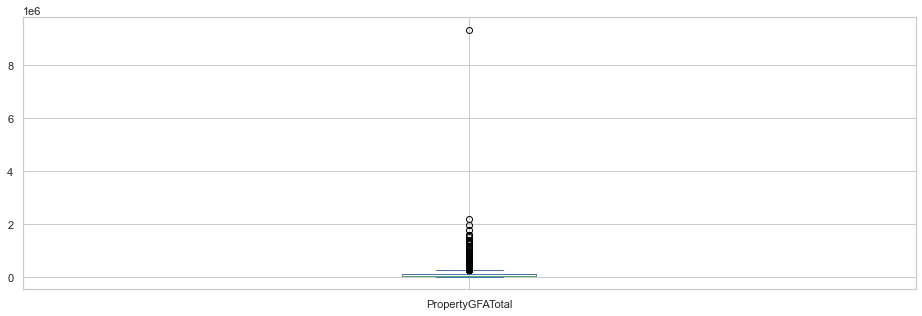

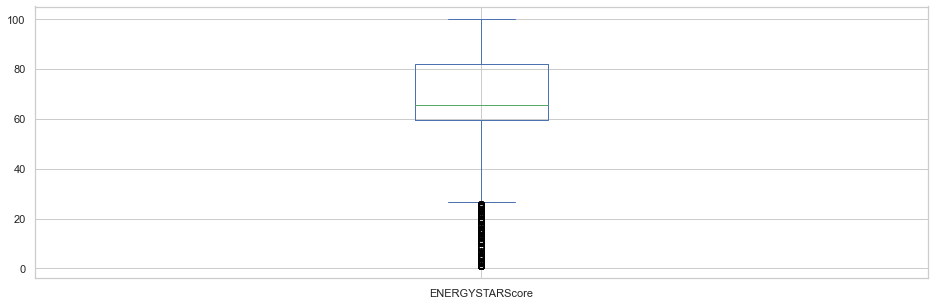

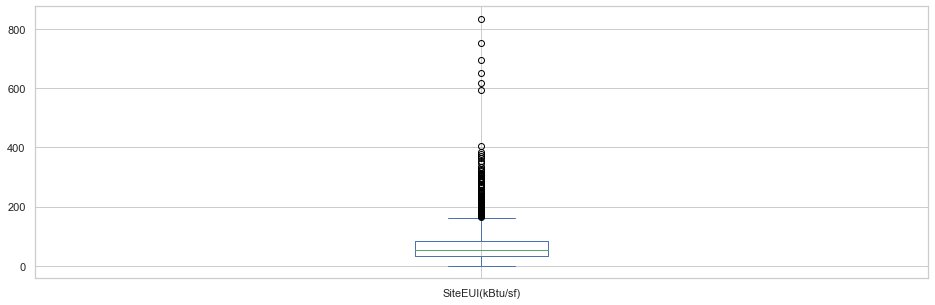

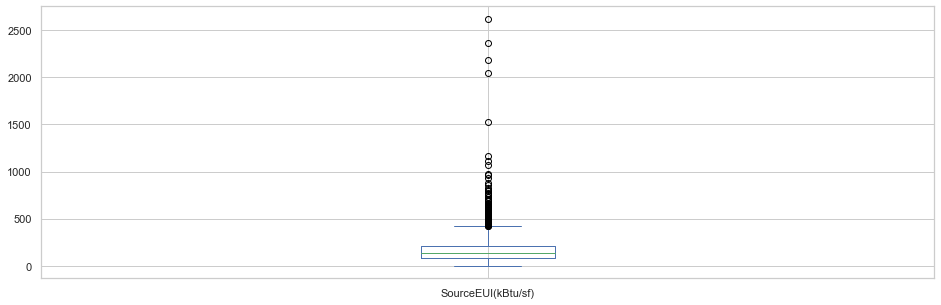

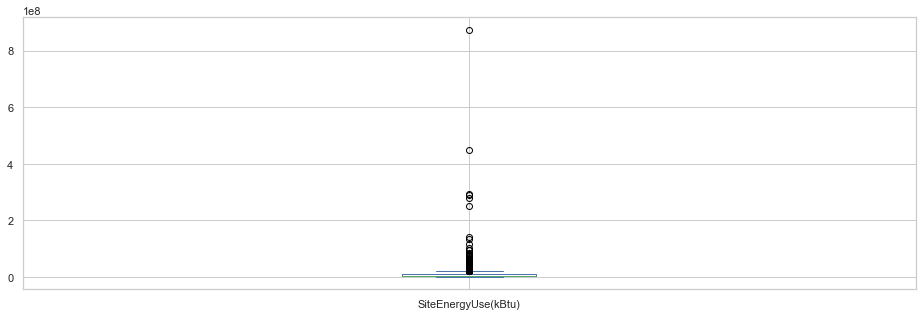

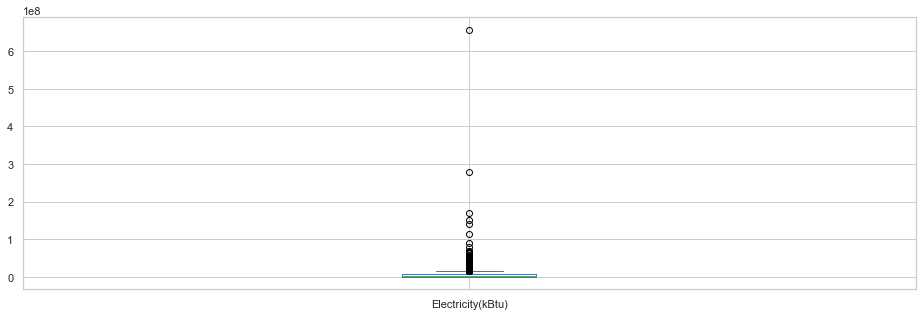

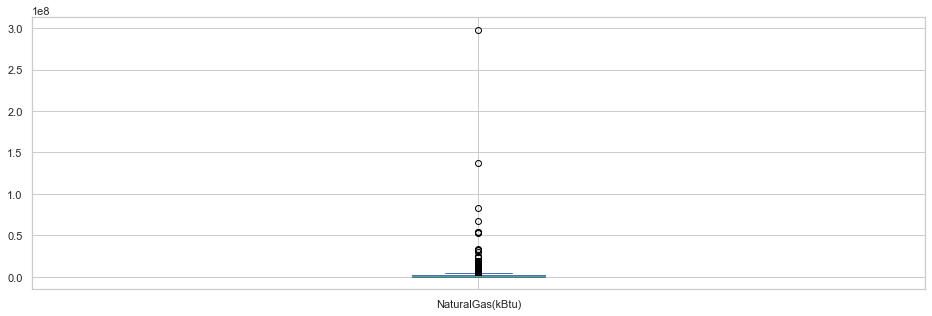

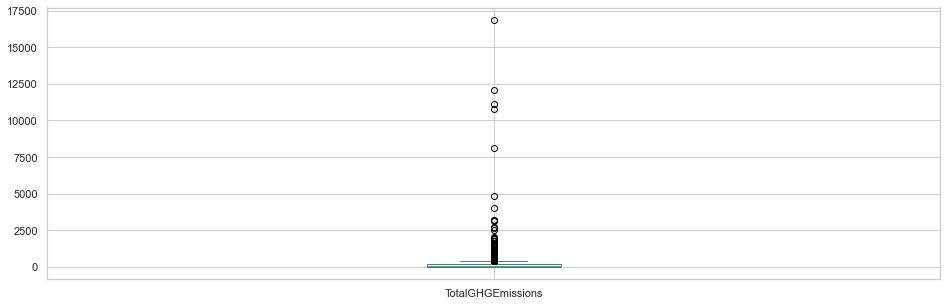

In [147]:
#Observation des outliers avant traitement
for i in varNum:
    plt.figure(1)
    datacopy[i].plot.box(figsize=(16,5))
    plt.show()

In [148]:
datacopy = rmOutliers(datacopy, varNum)
datacopy

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
1,264,2015,NonResidential,Mixed Use Property,7,MAGNOLIA / QUEEN ANNE,2002,110785.0,65.416836,95.800000,293.500000,1.060879e+07,1.022844e+07,3.807760e+05,91.530000
2,400,2015,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,1906,98370.0,45.000000,66.300000,207.500000,6.525887e+06,6.488262e+06,3.789300e+04,47.240000
4,499,2015,NonResidential,Small- and Mid-Sized Office,2,GREATER DUWAMISH,2008,76598.0,76.000000,81.100000,169.800000,4.476997e+06,2.234200e+06,2.242889e+06,134.690000
5,559,2015,NonResidential,Large Office,7,LAKE UNION,1981,186971.0,86.000000,67.700000,179.100000,1.266246e+07,9.657951e+06,3.004906e+06,226.920000
10,714,2015,NonResidential,Large Office,7,DOWNTOWN,1911,192960.0,95.000000,49.300000,111.200000,6.669954e+06,3.616068e+06,0.000000e+00,260.940000
11,838,2015,NonResidential,Medical Office,3,EAST,1928,83448.0,54.000000,93.900000,176.900000,6.668456e+06,2.661094e+06,4.007472e+06,231.390000
12,19462,2015,SPS-District K-12,K-12 School,5,NORTHEAST,1955,46732.0,89.000000,43.100000,75.500000,2.198064e+06,7.373950e+05,1.460700e+06,82.720000
14,19537,2015,SPS-District K-12,K-12 School,1,SOUTHWEST,1954,51489.0,94.000000,37.100000,68.400000,1.909346e+06,7.247420e+05,1.184634e+06,67.970000
15,19572,2015,NonResidential,Non-Refrigerated Warehouse,2,GREATER DUWAMISH,1981,30375.0,74.000000,11.100000,34.700000,3.381410e+05,3.381540e+05,0.000000e+00,2.360000
16,19596,2015,NonResidential,Worship Facility,6,BALLARD,1914,33589.0,95.000000,13.100000,21.300000,4.406580e+05,1.216670e+05,3.189960e+05,17.790000


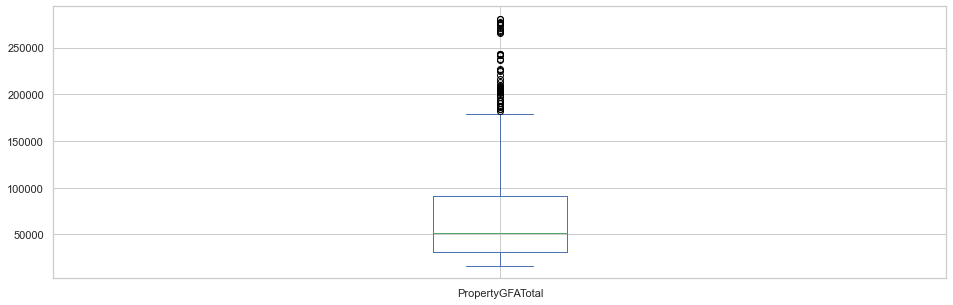

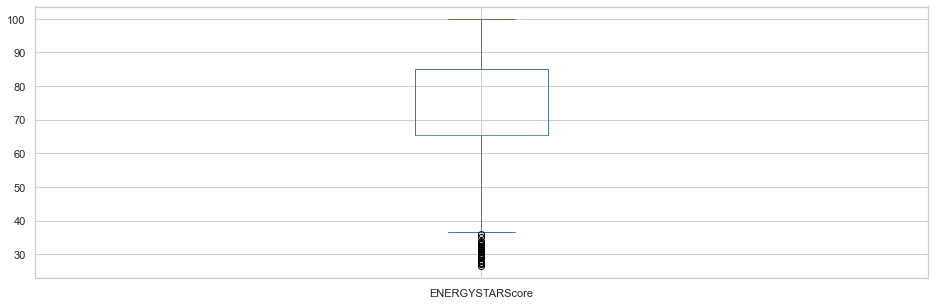

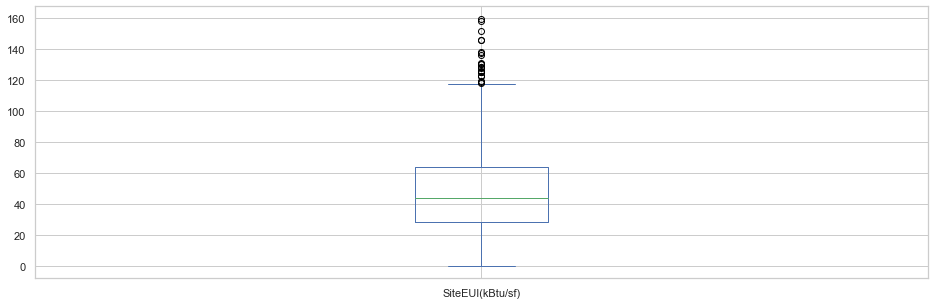

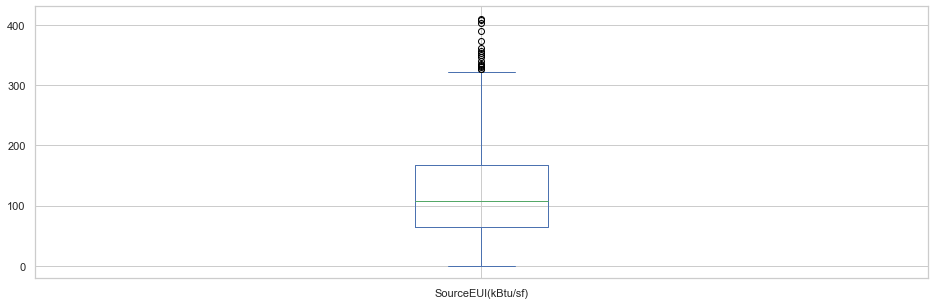

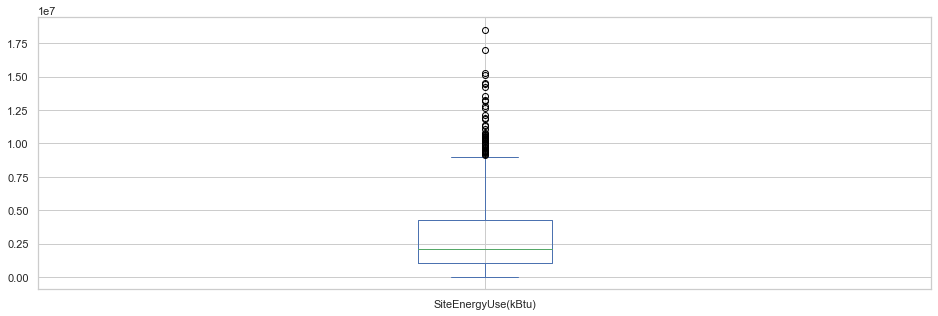

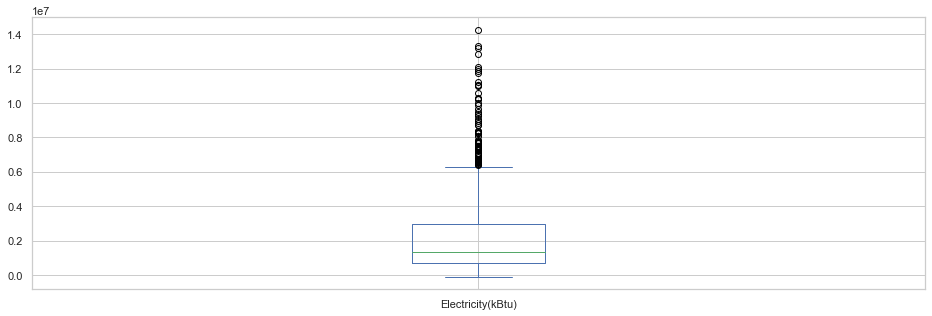

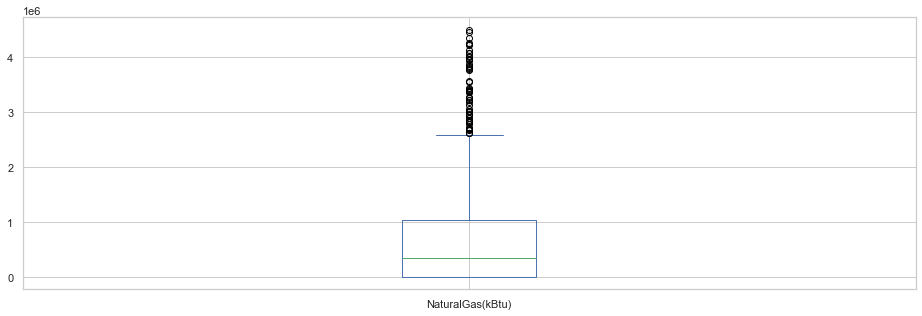

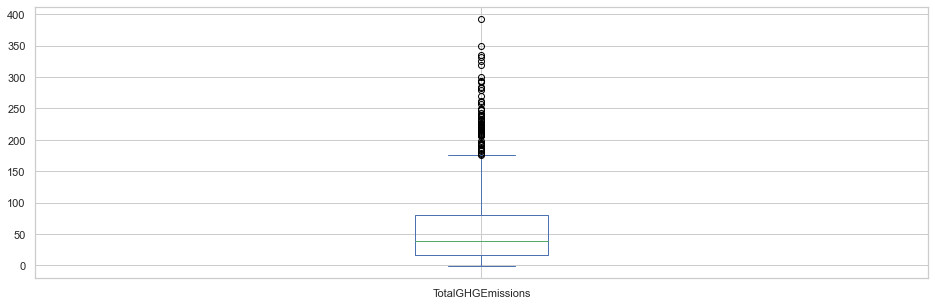

In [149]:
#Observation des outliers avant traitement
for i in varNum:
    plt.figure(1)
    datacopy[i].plot.box(figsize=(16,5))
    plt.show()

In [150]:
datacopy.describe()

,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,870.000000,870.000000,870.000000,870.000000,8.700000e+02,8.700000e+02,8.700000e+02,870.000000
mean,70244.601724,71.691530,48.297177,122.124934,3.094997e+06,2.286664e+06,7.247370e+05,61.481934
std,53502.916819,16.200099,28.792262,76.283957,2.851922e+06,2.434459e+06,9.576432e+05,65.304120
min,16300.000000,26.500000,0.000000,0.000000,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,31393.750000,65.416836,28.300000,64.649999,1.076118e+06,6.692490e+05,0.000000e+00,16.635000
50%,52044.000000,65.416836,43.600001,108.424998,2.110935e+06,1.345122e+06,3.403985e+05,39.482500
75%,90818.250000,85.000000,63.875001,167.550003,4.251302e+06,2.960277e+06,1.039985e+06,80.481250
max,280957.000000,100.000000,159.550002,410.149997,1.850632e+07,1.425010e+07,4.496845e+06,392.690000


GHGEmissionsIntensity est proportionel à TotalGHGEmissions

In [205]:
datacopy = datacopy.drop('GHGEmissionsIntensity', axis=1)

# Analyse Exploratoire

### Analyse Univariée

In [206]:
def catAnalysis(df, feature, x, y, figsize=(8,5), rotation="45", palette=None, order=None):
    
    data = (pd.DataFrame(df[feature].value_counts())
                .reset_index()
                .rename(columns={'index': x, feature: y}))
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=data, palette=palette, order=order);
    plt.xticks(rotation=rotation)
    plt.show()

#### Les différents types de batiments

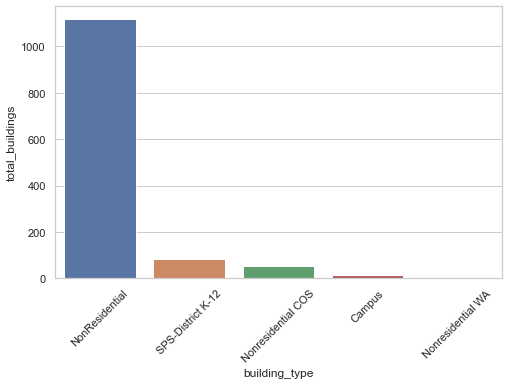

In [207]:
catAnalysis(datacopy, "BuildingType", "building_type", "total_buildings")


#### Localisation des différents batiments

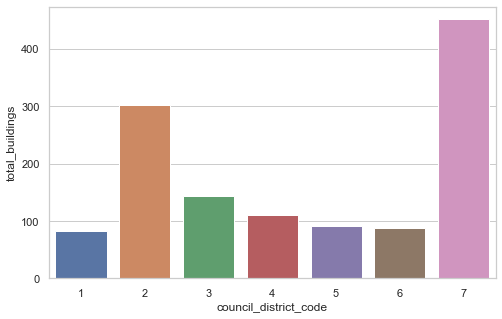

In [208]:
catAnalysis(datacopy, "CouncilDistrictCode", "council_district_code", "total_buildings", rotation="0")

#### Les villes voisines 

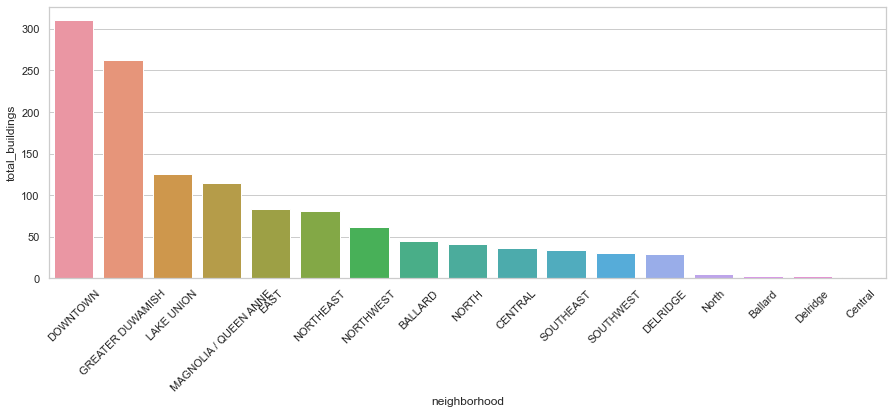

In [209]:
catAnalysis(datacopy, "Neighborhood", "neighborhood", "total_buildings", figsize=(15,5))


L'utilisation première du batiment

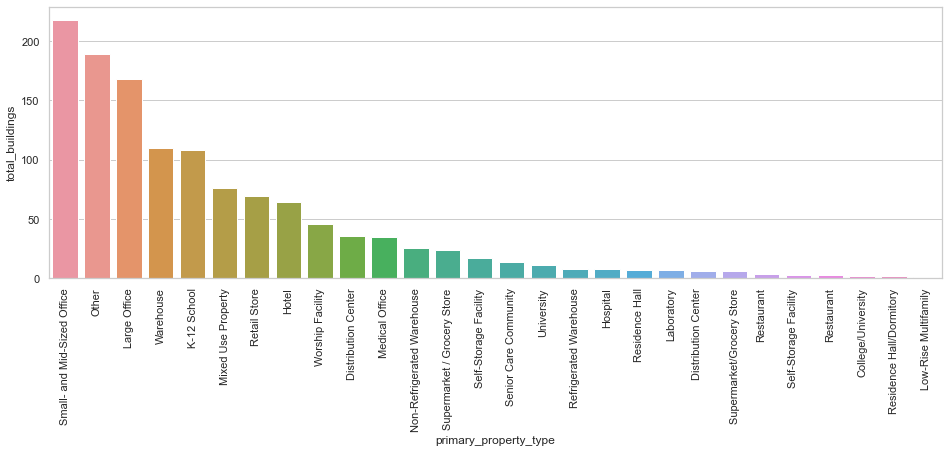

In [210]:
catAnalysis(datacopy, "PrimaryPropertyType", "primary_property_type", "total_buildings", figsize=(16,5), rotation="90")


#### Observation de l'ENERGYSTARScore des batiments

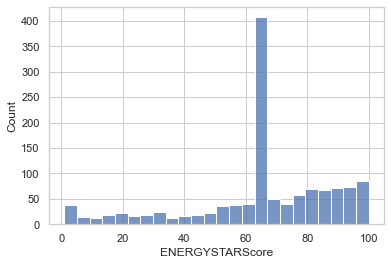

In [211]:
sns.histplot(datacopy["ENERGYSTARScore"].dropna(), kde=False);

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENERGYSTARScore'>

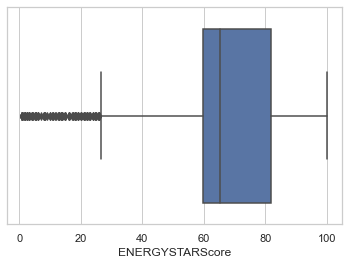

In [212]:
sns.boxplot(datacopy["ENERGYSTARScore"])

#### Observation de SiteEnergyUse avec passage à l'échelle logarithmique

In [213]:
datacopy = datacopy[datacopy['SiteEnergyUse(kBtu)']>=1]

In [214]:
datacopy['SiteEnergyUse_log'] = np.log10(datacopy['SiteEnergyUse(kBtu)'])
datacopy = datacopy.drop(('SiteEnergyUse(kBtu)'),axis=1)

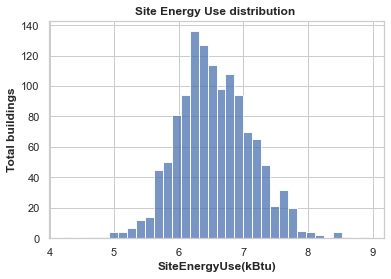

In [215]:
ax = sns.histplot(datacopy['SiteEnergyUse_log'], kde=False)
plt.title("Site Energy Use distribution ", fontweight="bold")
plt.xlabel("SiteEnergyUse(kBtu)", fontweight="bold")
plt.ylabel("Total buildings", fontweight="bold")
plt.show()

#### Observation des émissions de CO2 

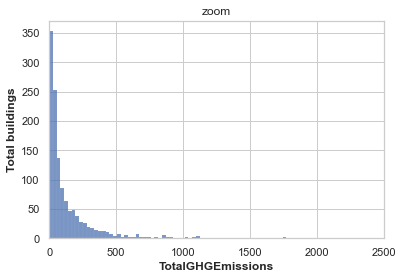

In [216]:
fig, ax = plt.subplots()
ax = sns.histplot(datacopy['TotalGHGEmissions'], kde=False)
plt.title("GHG Emissions  distribution ", fontweight="bold")
plt.xlabel("TotalGHGEmissions", fontweight="bold")
plt.ylabel("Total buildings", fontweight="bold")
ax.set_title('zoom')
ax.set_xlim([0,2500])
plt.show()

In [217]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 0 to 1267
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OSEBuildingID        1265 non-null   object 
 1   DataYear             1265 non-null   object 
 2   BuildingType         1265 non-null   object 
 3   PrimaryPropertyType  1265 non-null   object 
 4   CouncilDistrictCode  1265 non-null   object 
 5   Neighborhood         1265 non-null   object 
 6   YearBuilt            1265 non-null   object 
 7   NumberofBuildings    1265 non-null   float64
 8   NumberofFloors       1265 non-null   float64
 9   PropertyGFATotal     1265 non-null   float64
 10  ENERGYSTARScore      1265 non-null   float64
 11  SiteEUI(kBtu/sf)     1265 non-null   float64
 12  SourceEUI(kBtu/sf)   1265 non-null   float64
 13  Electricity(kBtu)    1265 non-null   float64
 14  NaturalGas(kBtu)     1265 non-null   float64
 15  TotalGHGEmissions    1265 non-null   f

### Analyse Bivariée

<AxesSubplot:>

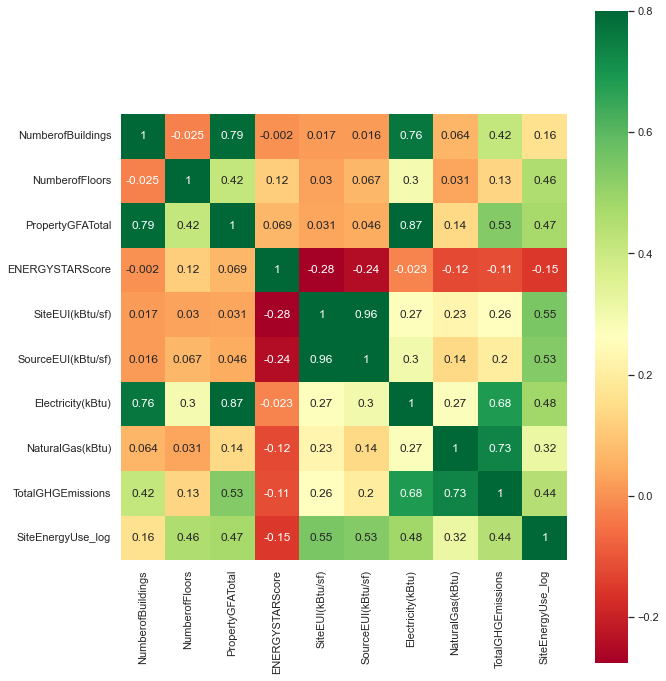

In [218]:
matrix=datacopy.corr()
f,ax= plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='RdYlGn', annot=True)

In [219]:
seuil = 0.7
corrPairs = matrix.unstack().sort_values(kind="quicksort")
forteCorr = (pd.DataFrame(corrPairs[(abs(corrPairs) > seuil)])
               .reset_index().rename(columns={0:'corr_coeff'}))
forteCorr = forteCorr[(forteCorr.index%2 == 0) & (forteCorr['level_0'] != forteCorr['level_1'])]
forteCorr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
8,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.957342
6,Electricity(kBtu),PropertyGFATotal,0.869530
4,PropertyGFATotal,NumberofBuildings,0.789542
2,Electricity(kBtu),NumberofBuildings,0.763607
0,NaturalGas(kBtu),TotalGHGEmissions,0.734935


#### Calcul du VIF pour vérifier la multicolinéarité 

Le facteur d'inflation de la variance mesure à quel point le comportement (variance) d'une variable indépendante est influencé, ou gonflé, par son interaction/corrélation avec les autres variables indépendantes. Le VIF permet une mesure rapide de la contribution d'une variable à l'erreur type dans la régression.

Des scores VIF supérieur à 5 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.
Les features suffixées EUI(kBtu/sf), sont des variables dont les valeurs sont ramenées à la surface par étage. Nous allons les supprimer car nous avons créer des variables pouvant permettre de ramener nos données à l'étage ou au building. Idem pour la variable GHGEmissionsIntensity

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
strong_corr_features = list(set(list(forteCorr['level_0'].values) + list(forteCorr['level_1'].values)))
X = datacopy[strong_corr_features].replace([np.inf, -np.inf], np.nan)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature        VIF
0   Electricity(kBtu)   9.033944
1  SourceEUI(kBtu/sf)  30.224611
2    NaturalGas(kBtu)   2.963312
3   TotalGHGEmissions   5.666781
4    PropertyGFATotal   5.522755
5   NumberofBuildings   3.463387
6    SiteEUI(kBtu/sf)  29.590096


Des scores VIF supérieur à 5 indiquent généralement une forte multicolinéarité. Ces variables fortement corrélées risquent d'impacter nos modèles.
Nous allons donc supprimer les colonnes SiteEUI(kBtu/sf), Electricity(kBtu), SourceEUI(kBtu/sf).
L’objectif est de se passer des relevés de consommation annuels. Nous alons supprimer la colonne NaturalGas

In [221]:
datacopy = datacopy. drop(['Electricity(kBtu)','NaturalGas(kBtu)', 'SourceEUI(kBtu/sf)','SiteEUI(kBtu/sf)'], axis=1)

In [222]:
datacopy

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUse_log
0,60,2015,NonResidential,Mixed Use Property,7,DOWNTOWN,1926,1.0,2.0,52549.0,65.416836,583.41,7.192677
1,264,2015,NonResidential,Mixed Use Property,7,MAGNOLIA / QUEEN ANNE,2002,1.0,4.0,110785.0,65.416836,91.53,7.025666
2,400,2015,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,1906,1.0,6.0,98370.0,45.000000,47.24,6.814640
3,442,2015,NonResidential,Large Office,7,LAKE UNION,1947,1.0,4.0,193788.0,59.000000,116.84,7.224280
4,499,2015,NonResidential,Small- and Mid-Sized Office,2,GREATER DUWAMISH,2008,1.0,3.0,76598.0,76.000000,134.69,6.650987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,50039,2016,NonResidential,Other,2,GREATER DUWAMISH,2015,1.0,2.0,108036.0,65.416836,91.98,6.698265
1264,50070,2016,NonResidential,Other,4,NORTHEAST,2013,1.0,1.0,72000.0,65.416836,67.65,6.466242
1265,50081,2016,NonResidential,K-12 School,3,GREATER DUWAMISH,2015,1.0,3.0,45000.0,77.000000,9.24,6.122535
1266,50094,2016,NonResidential,Mixed Use Property,7,LAKE UNION,2015,1.0,6.0,345290.0,65.416836,1000.06,7.595101


On peut créer une nouvelle variable Age des batiments qui seraient la différence en Data Year(l'année ou a été fait le prélévement) et YearBuilt(Année de construction des batiments)

OSEBuildingID  n'est pas intéressante pour la suite

In [223]:
datacopy = datacopy.drop('OSEBuildingID', axis=1)

In [224]:
datacopy.shape

(1265, 12)

#### Création et Observation de la variable Age à partir de DataYear et YearBuilt

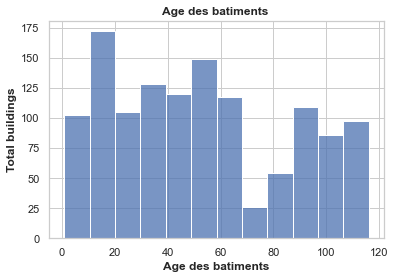

In [225]:
datacopy['Age'] = datacopy['DataYear'] - datacopy['YearBuilt']
datacopy = datacopy.drop(['DataYear', 'YearBuilt'], axis=1)
fig, ax = plt.subplots()
ax = sns.histplot(datacopy['Age'], kde=False)
plt.title("Age des batiments ", fontweight="bold")
plt.xlabel("Age des batiments", fontweight="bold")
plt.ylabel("Total buildings", fontweight="bold")
plt.show()



In [226]:
def rmOutliers(dataset, varNum):
    Q1 = dataset[varNum].quantile(0.25)
    Q3 = dataset[varNum].quantile(0.75)
    IQR = Q3 - Q1
    dataset = dataset[~((dataset[varNum] < (Q1 - 1.5 * IQR)) |(dataset[varNum] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return dataset


In [227]:
#Enregistrement de notre dataset cleané dans le fichier csv cleanData pour l'utiliser dans nootre analyse à venir
datacopy.to_csv('cleanData.csv', index=None)